# using the calculated image matrix to un distort the image.

In [1]:
#imports 
import pickle
import cv2 as cv
from matplotlib import pyplot as plt
from os import path
from PIL import Image as img

In [2]:
curdir = path.abspath("")
root_dir = path.abspath(path.join(curdir,path.pardir))

In [3]:
sample = img.open(path.abspath(path.join(curdir,"sample1.jpg")))

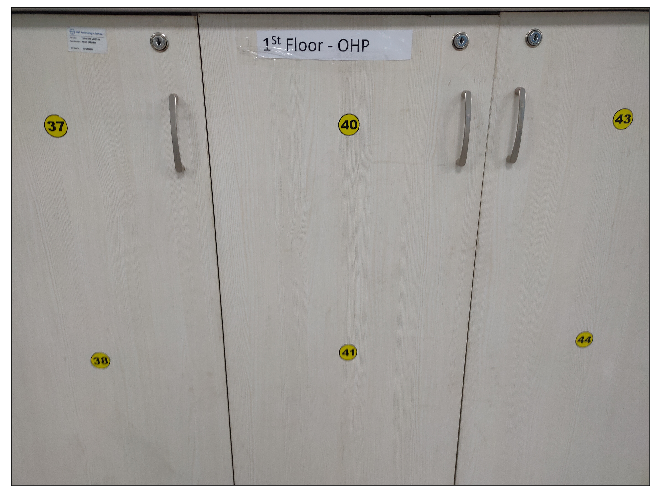

In [10]:
plt.xticks([]),plt.yticks([])
plt.style.use("seaborn-poster")
plt.imshow(sample)

In [5]:
datafile1 = path.abspath(path.join(root_dir, "calib"))

with open(datafile1, "rb") as file:
    ret, mtx, dist, rvecs, tvecs = pickle.load(file)

In [6]:
gray = cv.imread(path.abspath(path.join(curdir,"sample1.jpg")), 0)
h,  w = gray.shape

In [7]:
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 0, (w,h))

In [8]:
# undistort
udst = cv.undistort(gray, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
udst = udst[y:y+h, x:x+w]

True

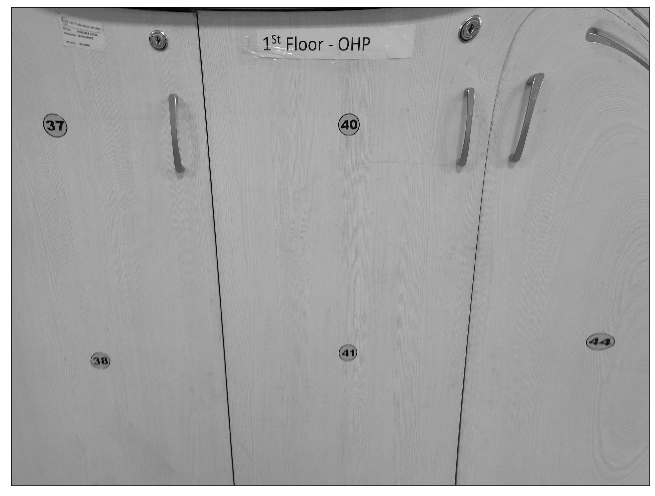

In [9]:
plt.xticks([]),plt.yticks([])
plt.imshow(udst,cmap="gray")
cv.imwrite("undist.jpg",udst)